In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [150]:
def preprocess_data(data):
    data['release date'] = pd.to_datetime(data['release date'], format='%d/%m/%Y')

    min_date = data['release date'].min()
    
    data['release date'] = (data['release date'] - min_date).dt.days
    
    data = pd.get_dummies(data, columns=['brand', 'operating system'], prefix=['brand', 'os'])

    data.dropna(inplace=True)

    return data


In [151]:
def split_data(data):
    X = data.drop(['cellphone_id', 'model', 'price'], axis=1)
    y = data['price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [152]:
def select_model(X_train, y_train):
    return KNeighborsRegressor(n_neighbors=5) 

In [153]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

In [154]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [162]:
def generate_recommendations(model, data, user_preferences, top_n=5):
    brand, screen_size, price = user_preferences
    brand_column = f'brand_{brand}'
    filtered_data = data[(data[brand_column] == 1) & (data['screen size'] >= screen_size) & (data['price'] <= price)]

    if len(filtered_data) < top_n:
        filtered_data = data[data['price'] <= price]

    X_recommend = filtered_data.drop(['cellphone_id', 'model', 'price'], axis=1)
    _, top_indices = model.kneighbors(X_recommend, n_neighbors=top_n)
    recommendations = data.iloc[top_indices.flatten(), :].copy()
    recommendations['distance'] = top_indices.flatten()

    return recommendations


In [164]:
if __name__ == '__main__':
    data = pd.read_csv('cellphones data.csv')

    data = preprocess_data(data)

    X_train, X_test, y_train, y_test = split_data(data)

    model = select_model(X_train, y_train)

    train_model(model, X_train, y_train)

    mse = evaluate_model(model, X_test, y_test)
    print("Mean Squared Error:", mse)

    user_preferences = ('Apple', 5.5, 800)

    recommendations = generate_recommendations(model, data, user_preferences, top_n=5)

    print("Recommended Cellphones:")
    print(recommendations)

Mean Squared Error: 130918.54285714285
Recommended Cellphones:
    cellphone_id             model  internal memory  RAM  performance  \
2              2         iPhone 13              128    4         7.75   
9              9        Galaxy A53              128    6         3.79   
12            12  Galaxy S22 Ultra              128    8         9.68   
10            10        Galaxy S22              128    8         8.81   
6              6         Zenfone 8              128    8         6.76   
..           ...               ...              ...  ...          ...   
21            21               10T              128    8        11.00   
22            22       Find X5 Pro              256   12        10.12   
8              8        Galaxy A32               64    4         2.20   
20            20            10 Pro              128    8         8.86   
11            11   Galaxy S22 Plus              128    8         7.22   

    main camera  selfie camera  battery size  screen size  w

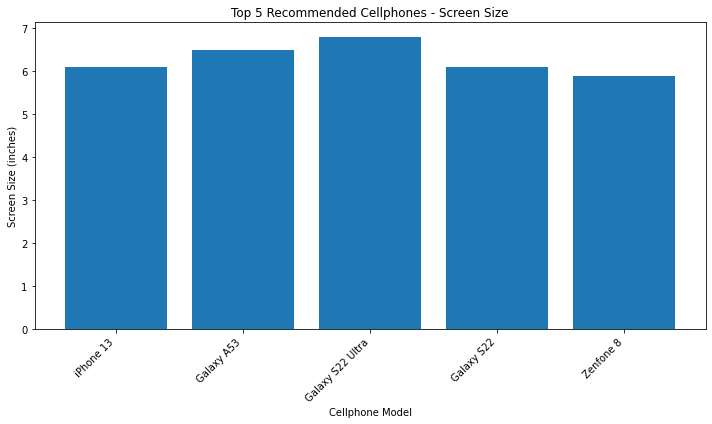

In [168]:
import matplotlib.pyplot as plt

top_5_recommendations = recommendations.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_recommendations['model'], top_5_recommendations['screen size'])
plt.xlabel('Cellphone Model')
plt.ylabel('Screen Size (inches)')
plt.title('Top 5 Recommended Cellphones - Screen Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



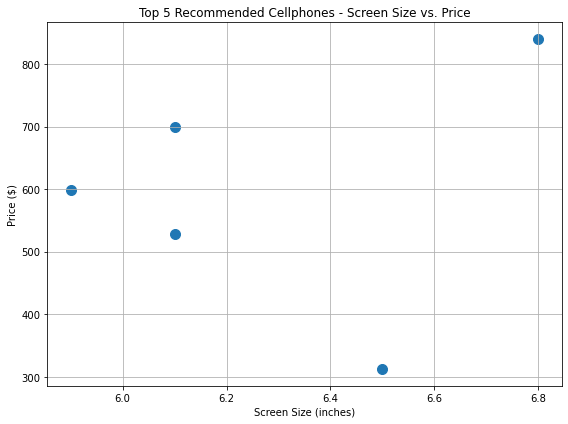

In [169]:
plt.figure(figsize=(8, 6))
plt.scatter(top_5_recommendations['screen size'], top_5_recommendations['price'], marker='o', s=100)
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price ($)')
plt.title('Top 5 Recommended Cellphones - Screen Size vs. Price')
plt.grid(True)
plt.tight_layout()
plt.show()
